In [1]:
import os
DIRECTORY_PATH = '/'
os.chdir(DIRECTORY_PATH)

# Imports

In [74]:
from utils.load_datasets import load_datasets
from utils.data_utils import extract_year, split_movie_genres
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
sns.set()

# Load Data

In [3]:
df_movies, df_ratings, df_links = load_datasets()

# Datasets

In [5]:
df_movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
df_links.head()

,movie_id,tmdb_id
0,1,862.0
1,2,8844.0
2,3,15602.0
3,4,31357.0
4,5,11862.0


## Counts

In [19]:
print('# Unique Users  :', df_ratings.user_id.nunique())
print('# Unique Movies :', df_ratings.movie_id.nunique())
print('# Ratings       :', df_ratings.rating.count())

# Unique Users  : 610
# Unique Movies : 9724
# Ratings       : 100836


## Ratings Distribution

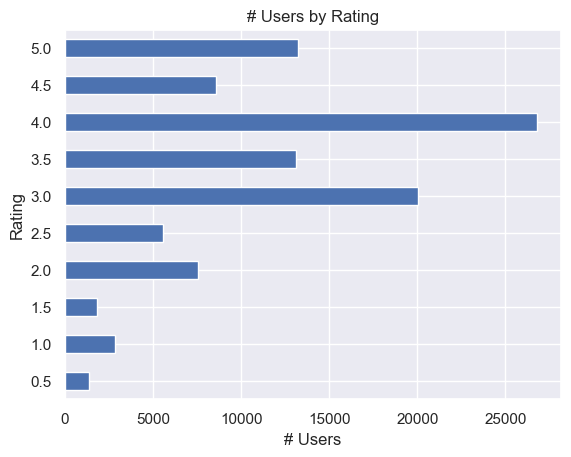

In [48]:
df_ratings.groupby('rating').agg({'user_id': 'count'}).plot.barh(legend=False)
plt.title('# Users by Rating')
plt.xlabel('# Users')
plt.ylabel('Rating')
plt.show()

## Check Nulls

In [49]:
df_movies.isna().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [50]:
df_ratings.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [51]:
df_links.isna().sum()

movie_id    0
tmdb_id     8
dtype: int64

# List of movies without any rating

In [64]:
df_movie_rating[df_movie_rating.user_id.isna()].reset_index(drop=True)

,movie_id,title,genres,user_id,rating,timestamp
0,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN,NaN,NaN
1,2939,Niagara (1953),Drama|Thriller,NaN,NaN,NaN
2,3338,For All Mankind (1989),Documentary,NaN,NaN,NaN
3,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN,NaN,NaN
4,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN,NaN,NaN
5,5721,"Chosen, The (1981)",Drama,NaN,NaN,NaN
6,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN,NaN,NaN
7,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN,NaN,NaN
8,7020,Proof (1991),Comedy|Drama|Romance,NaN,NaN,NaN
9,7792,"Parallax View, The (1974)",Thriller,NaN,NaN,NaN


## Movies without year

In [72]:
print(f"Movies without year in the title: {df_movies.title.apply(extract_year).isna().sum()}")

Movies without year in the title: 13


In [73]:
df_movies[df_movies.title.apply(extract_year).isna()]

,movie_id,title,genres
6059,40697,Babylon 5,Sci-Fi
9031,140956,Ready Player One,Action|Sci-Fi|Thriller
9091,143410,Hyena Road,(no genres listed)
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed)
9179,149334,Nocturnal Animals,Drama|Thriller
9259,156605,Paterson,(no genres listed)
9367,162414,Moonlight,Drama
9448,167570,The OA,(no genres listed)
9514,171495,Cosmos,(no genres listed)
9515,171631,Maria Bamford: Old Baby,(no genres listed)


## Movie genre distribution

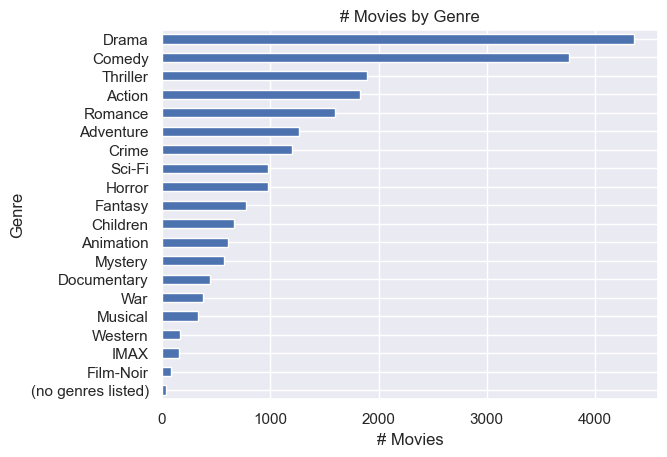

In [93]:
split_movie_genres(df_movies).drop(columns=['title' ,'movie_id']).sum().sort_values().plot.barh()
plt.title('# Movies by Genre')
plt.xlabel('# Movies')
plt.ylabel('Genre')
plt.show()